# Import packages and llibraries

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

# Importing dataset

In [2]:
rawData = pd.read_csv('titanic_raw.csv')
rawData

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Explanatory

### Missing data

In [33]:
df = rawData.copy()
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Heat map

C:\Users\tranl\AppData\Local\Temp\ipykernel_16144\1790640632.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='Oranges');


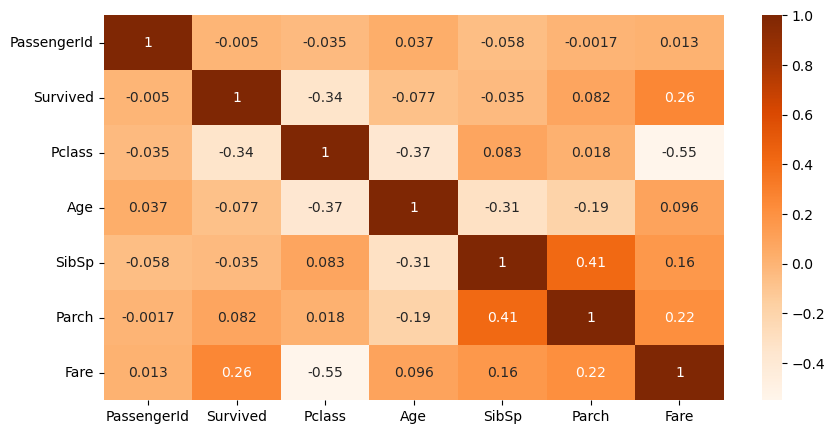

In [4]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), annot=True, cmap='Oranges');

In [5]:
correlation = abs(pd.DataFrame(df.corr().Survived))
correlation

C:\Users\tranl\AppData\Local\Temp\ipykernel_16144\2362223190.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = abs(pd.DataFrame(df.corr().Survived))


,Survived
PassengerId,0.005007
Survived,1.000000
Pclass,0.338481
Age,0.077221
SibSp,0.035322
Parch,0.081629
Fare,0.257307


### Visualization target based on feature

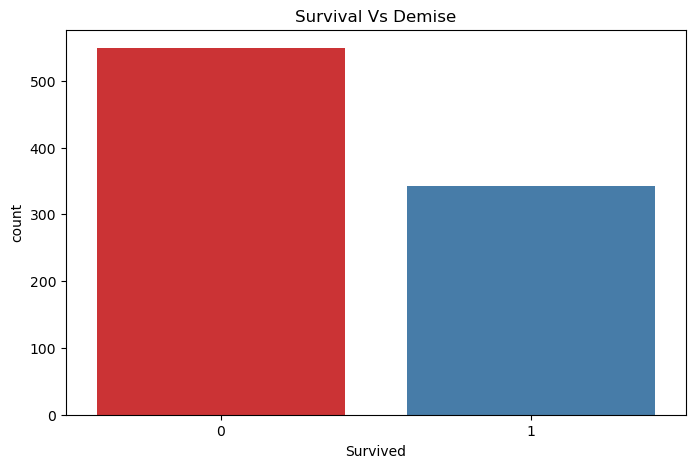

In [7]:
plt.figure(figsize=(8, 5))
sns.countplot(x="Survived", data=df, palette="Set1")
plt.title("Survival Vs Demise")
plt.show()

<Figure size 800x300 with 0 Axes>

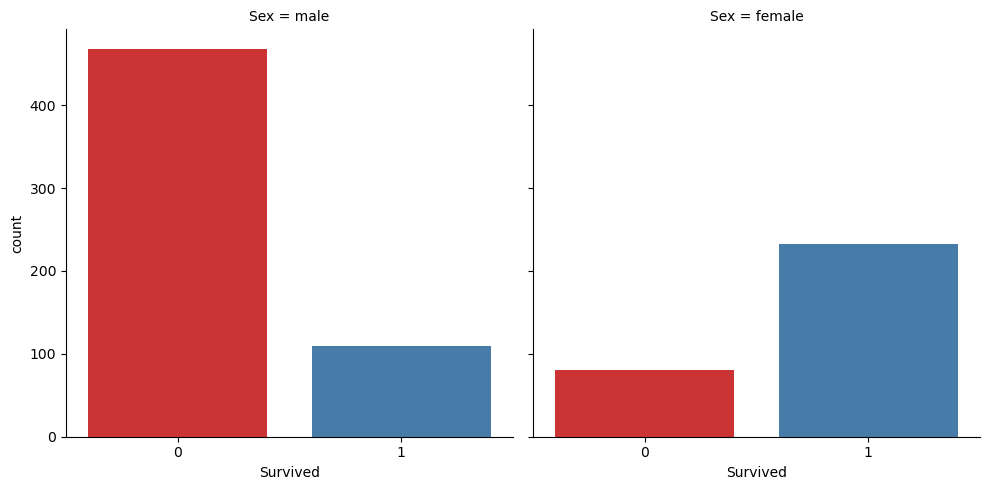

In [9]:
# Sex_male - 0=Female, 1=Male
plt.figure(figsize=(8, 3))
sns.catplot(x='Survived', col='Sex', kind='count', data=df, palette="Set1")

<Figure size 800x300 with 0 Axes>

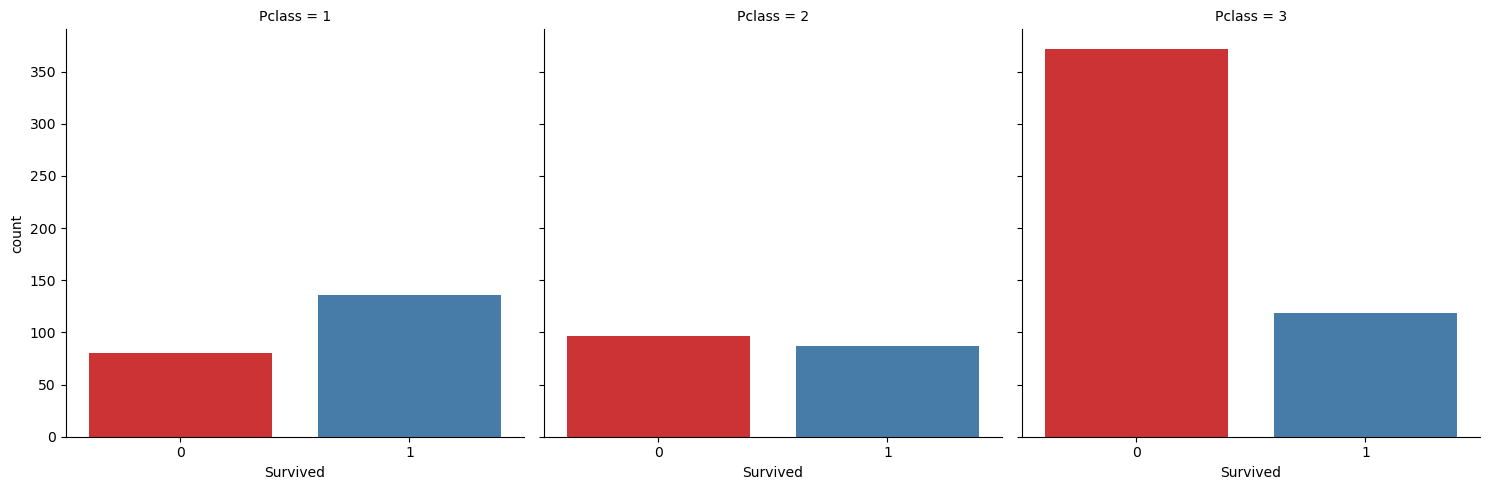

In [10]:
plt.figure(figsize=(8, 3))
sns.catplot(x='Survived', col='Pclass', kind='count', data=df, palette="Set1")
plt.show()

<Figure size 800x300 with 0 Axes>

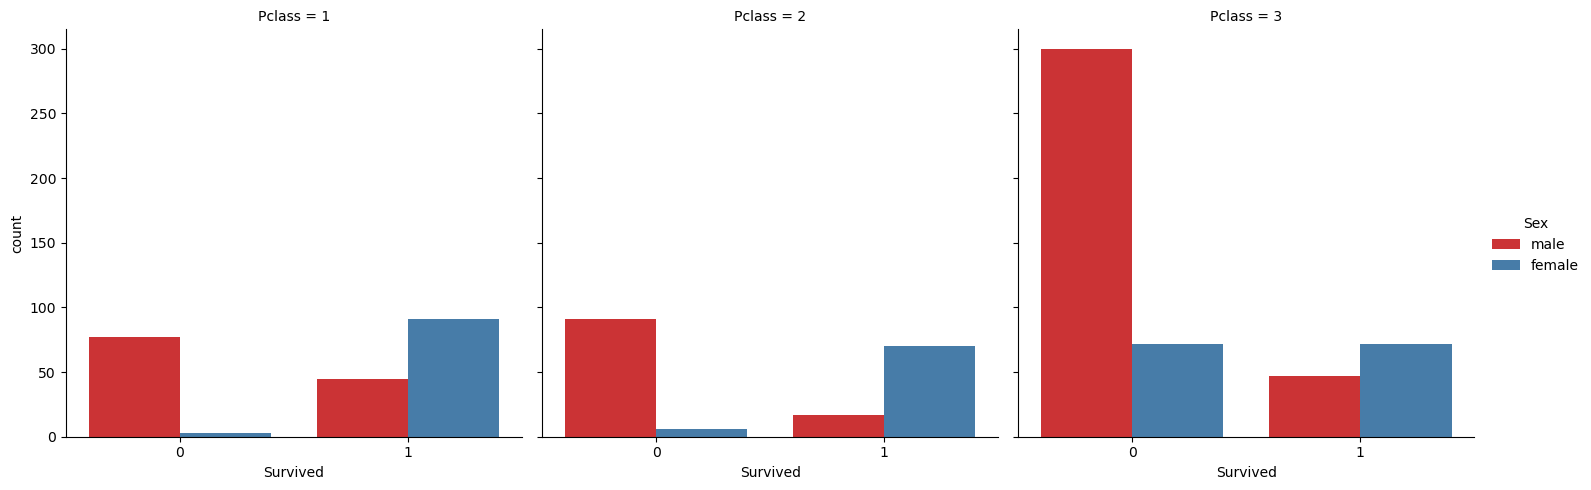

In [12]:
plt.figure(figsize=(8, 3))
sns.catplot(x='Survived', col='Pclass', hue='Sex' , kind='count', data=df, palette="Set1")
plt.show()

<Figure size 800x300 with 0 Axes>

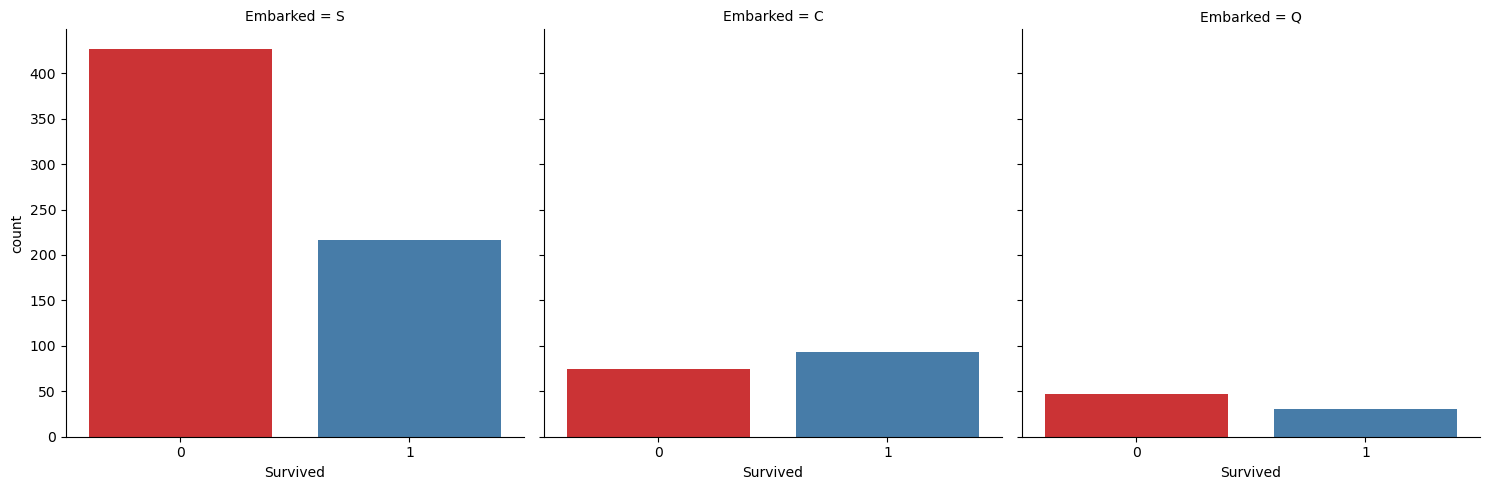

In [13]:
plt.figure(figsize=(8, 3))
sns.catplot(x='Survived', col='Embarked', kind='count', data=df, palette="Set1")
plt.show()

<Figure size 800x300 with 0 Axes>

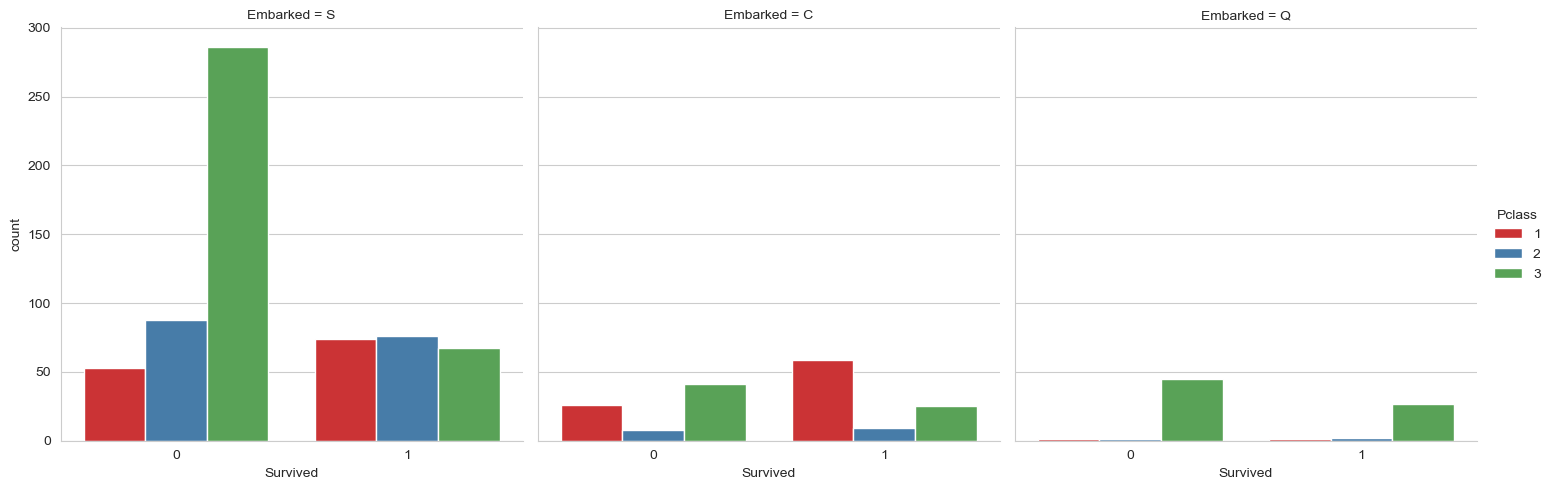

In [15]:
plt.figure(figsize=(8, 3))
sns.set_style('whitegrid')
sns.catplot(x='Survived', col='Embarked', hue = 'Pclass', kind='count', data=df,palette="Set1");
plt.show()

<Figure size 800x300 with 0 Axes>

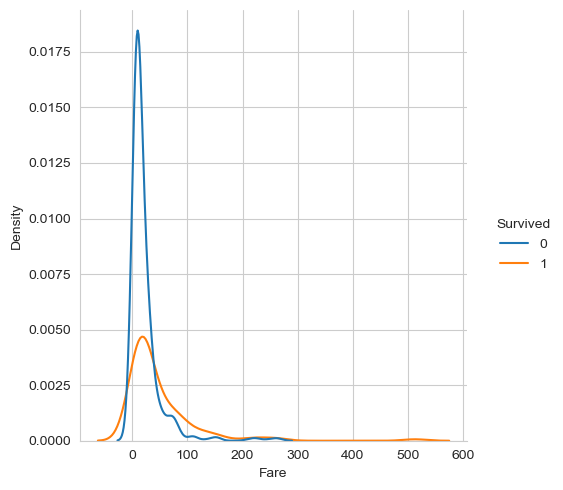

In [16]:
plt.figure(figsize=(8, 3))
sns.displot(data=df, x="Fare",hue='Survived',kind ='kde')
plt.show()

### Statisticcal

In [18]:
pd.crosstab(df.Sex, df.Survived, normalize="index").style.background_gradient(cmap='Blues')

Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


In [19]:
pd.crosstab(df.Pclass, df.Survived, normalize="index").style.background_gradient(cmap='Blues')

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


In [21]:
pd.crosstab(df.Embarked,df.Survived,normalize = "index" ).style.background_gradient(cmap='Blues')

Survived,0,1
Embarked,,
C,0.446429,0.553571
Q,0.610390,0.389610
S,0.663043,0.336957


### Visual representation of features

<Axes: xlabel='Age', ylabel='Count'>

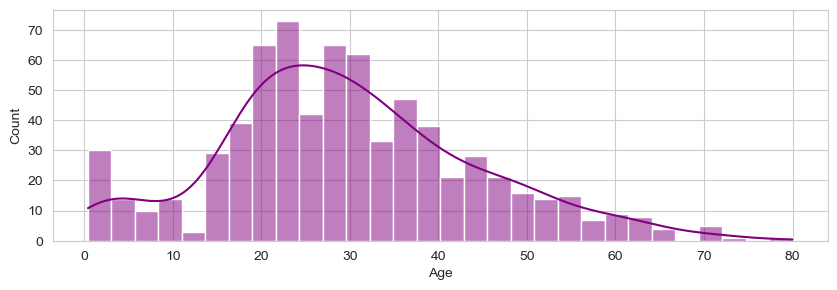

In [22]:
plt.figure(figsize=(10, 3))
sns.histplot(df['Age'].dropna(),kde=True,color='purple',bins=30)

<Axes: xlabel='SibSp', ylabel='count'>

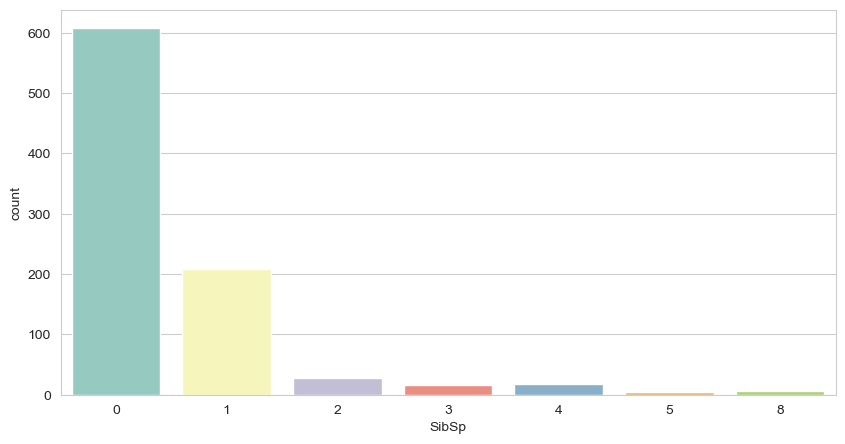

In [23]:
plt.figure(figsize=(10, 5))
sns.countplot(x='SibSp',data=df, palette='Set3')

<Axes: xlabel='Parch', ylabel='count'>

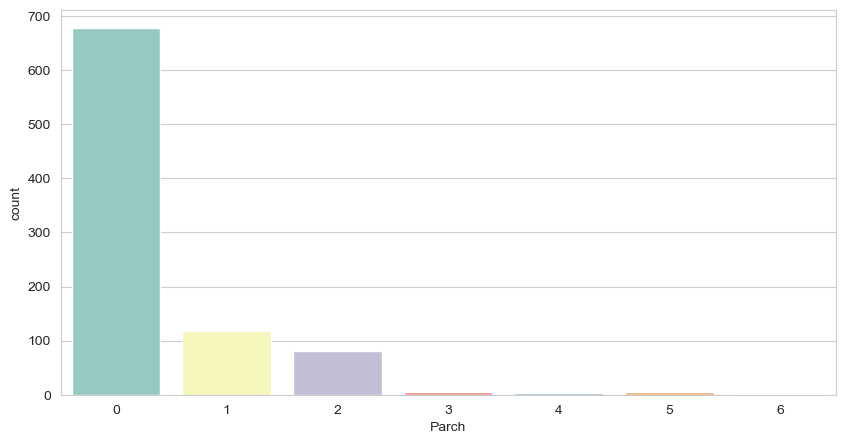

In [24]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Parch', data=df ,palette='Set3')

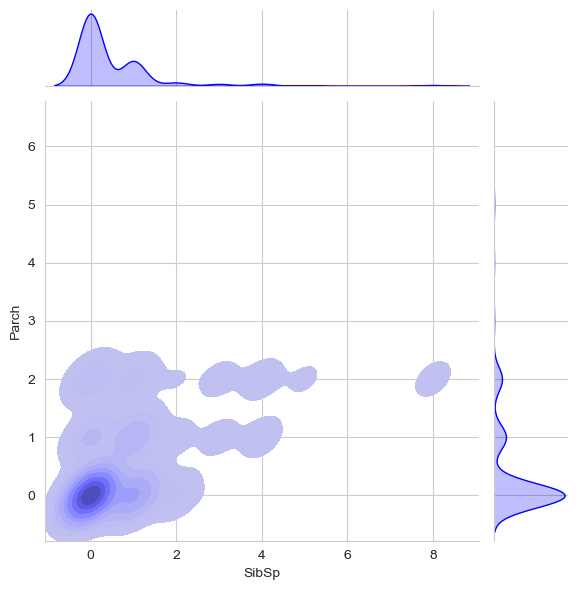

In [25]:
sns.jointplot(x='SibSp', y='Parch', data=df, color='blue', kind='kde', fill =True);

# Preprocessing

### handling missing data of Age

Median:  Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64


Text(0.5, 1.0, 'Age over Pclass')

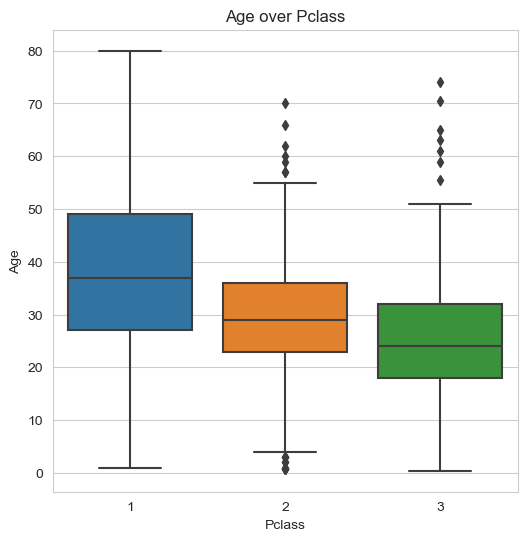

In [27]:
medianDataset = df.groupby('Pclass')['Age'].median()
print("Median: ", medianDataset)

plt.figure(figsize=(6, 6))
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title('Age over Pclass')

In [30]:
def Age_func(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [31]:
df['Age'] = df[['Age','Pclass']].apply(Age_func,axis=1)

print(f"Missing data of dataset after handling: {df['Age'].isnull().sum()}")

Missing data of dataset after handling: 0


### Handling missing data of Cabin

In [34]:
# Because Cabin represents as C85, C123, etc. So we can drop this column
df.drop('Cabin',axis=1,inplace=True)


### Handling missing data of Embarked

In [35]:
# Having only two rows of Embarked is missing. Therefore, we can drop those two rows
df.dropna(inplace=True)
df['Embarked'].isnull().sum()

0

### Encoding categorical features

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 66.8+ KB


In [37]:
df.drop(['Name','Ticket'],axis=1,inplace=True)

In [38]:
df = pd.get_dummies(df, columns = ['Sex'], drop_first=True)
df = pd.get_dummies(df, columns = ['Embarked'], drop_first=True)

df.head(5)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


### Droping columns have any insignificant

In [39]:
df.drop('PassengerId',axis=1,inplace=True)

df.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


# Train and Test split

In [40]:
X = df.drop(['Survived'],axis = 1)
y = df['Survived']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=101)

# Features scaling

In [43]:
cols = X_train.columns

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train,columns=cols)
X_test = pd.DataFrame(X_test,columns=cols)

# Logistic regression model

In [44]:
LogisticRegression_model = LogisticRegression(max_iter=4000)
LogisticRegression_model.fit(X_train,y_train)

LogisticRegression(max_iter=4000)

In [45]:
y_pred = LogisticRegression_model.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

# Evaluation

### Confusion matrix

In [46]:
confusion_matrix = confusion_matrix(y_test,y_pred)
confusion_matrix

array([[108,  20],
       [ 24,  62]], dtype=int64)

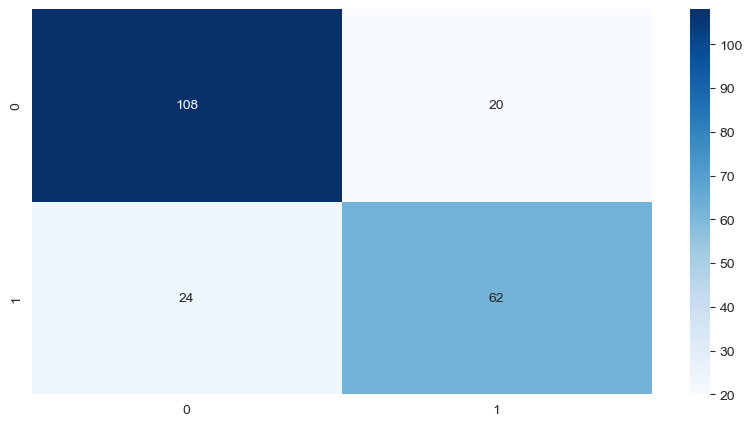

In [47]:
plt.figure(figsize=(10, 5))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.show()

In [48]:
print('Accuracy of Logistic Regression model is  : ', round(metrics.accuracy_score(y_test, y_pred), 2))
print('Recall of Logistic Regression model is    : ', round(metrics.recall_score(y_test, y_pred), 2))
print('Precision of Logistic Regression model is : ', round(metrics.precision_score(y_test, y_pred), 2))

Accuracy of Logistic Regression model is  :  0.79
Recall of Logistic Regression model is    :  0.72
Precision of Logistic Regression model is :  0.76


In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       128
           1       0.76      0.72      0.74        86

    accuracy                           0.79       214
   macro avg       0.79      0.78      0.78       214
weighted avg       0.79      0.79      0.79       214

